## Import Library

In [1]:
import numpy as np
import pandas as pd

# Library untuk visualisasi data
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, StandardScaler, LabelEncoder, OneHotEncoder

#for model
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC

# ANN model # Artificial Neural Network
import keras
from tensorflow.keras import models
from tensorflow.keras import layers
from tensorflow.keras import optimizers
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation

#for checking testing results
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score, classification_report, confusion_matrix

ModuleNotFoundError: No module named 'tensorflow.python'

# Import Data

In [9]:
df = pd.read_csv('Big Project Progress Data_ Kelompok 2.csv')
df.head()

,Age,Gender,Height,Weight,CALC,FAVC,FCVC,NCP,SCC,SMOKE,CH2O,family_history_with_overweight,FAF,TUE,CAEC,MTRANS,NObeyesdad
0,21.0,Female,1.62,64.0,no,no,2.0,3.0,no,no,2.0,yes,0.0,1.0,Sometimes,Public_Transportation,Normal_Weight
1,21.0,Female,1.52,56.0,Sometimes,no,3.0,3.0,yes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
2,23.0,Male,1.80,77.0,Frequently,no,2.0,3.0,no,no,2.0,yes,2.0,1.0,Sometimes,Public_Transportation,Normal_Weight
3,27.0,Male,1.80,87.0,Frequently,no,3.0,3.0,no,no,2.0,no,2.0,0.0,Sometimes,Walking,Overweight_Level_I
4,22.0,Male,1.78,89.8,Sometimes,no,2.0,1.0,no,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II


In [10]:
df

,Age,Gender,Height,Weight,CALC,FAVC,FCVC,NCP,SCC,SMOKE,CH2O,family_history_with_overweight,FAF,TUE,CAEC,MTRANS,NObeyesdad
0,21.000000,Female,1.620000,64.000000,no,no,2.0,3.0,no,no,2.000000,yes,0.000000,1.000000,Sometimes,Public_Transportation,Normal_Weight
1,21.000000,Female,1.520000,56.000000,Sometimes,no,3.0,3.0,yes,yes,3.000000,yes,3.000000,0.000000,Sometimes,Public_Transportation,Normal_Weight
2,23.000000,Male,1.800000,77.000000,Frequently,no,2.0,3.0,no,no,2.000000,yes,2.000000,1.000000,Sometimes,Public_Transportation,Normal_Weight
3,27.000000,Male,1.800000,87.000000,Frequently,no,3.0,3.0,no,no,2.000000,no,2.000000,0.000000,Sometimes,Walking,Overweight_Level_I
4,22.000000,Male,1.780000,89.800000,Sometimes,no,2.0,1.0,no,no,2.000000,no,0.000000,0.000000,Sometimes,Public_Transportation,Overweight_Level_II
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2106,20.976842,Female,1.710730,131.408528,Sometimes,yes,3.0,3.0,no,no,1.728139,yes,1.676269,0.906247,Sometimes,Public_Transportation,Obesity_Type_III
2107,21.982942,Female,1.748584,133.742943,Sometimes,yes,3.0,3.0,no,no,2.005130,yes,1.341390,0.599270,Sometimes,Public_Transportation,Obesity_Type_III
2108,22.524036,Female,1.752206,133.689352,Sometimes,yes,3.0,3.0,no,no,2.054193,yes,1.414209,0.646288,Sometimes,Public_Transportation,Obesity_Type_III
2109,24.361936,Female,1.739450,133.346641,Sometimes,yes,3.0,3.0,no,no,2.852339,yes,1.139107,0.586035,Sometimes,Public_Transportation,Obesity_Type_III


### EDA

### Information of dataset

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Age                             2111 non-null   float64
 1   Gender                          2111 non-null   object 
 2   Height                          2111 non-null   float64
 3   Weight                          2111 non-null   float64
 4   CALC                            2111 non-null   object 
 5   FAVC                            2111 non-null   object 
 6   FCVC                            2111 non-null   float64
 7   NCP                             2111 non-null   float64
 8   SCC                             2111 non-null   object 
 9   SMOKE                           2111 non-null   object 
 10  CH2O                            2111 non-null   float64
 11  family_history_with_overweight  2111 non-null   object 
 12  FAF                             21

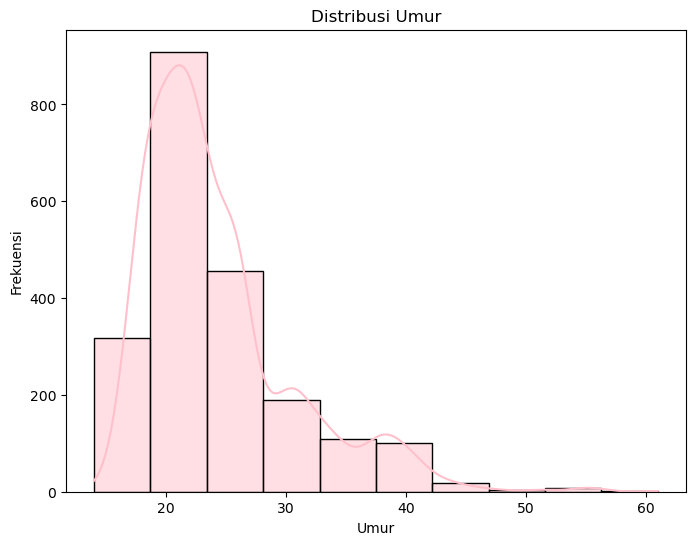

In [ ]:
# Contoh visualisasi: Distribusi umur
plt.figure(figsize=(8, 6))
sns.histplot(df['Age'], bins=10, kde=True, color='pink')
plt.title('Distribusi Umur')
plt.xlabel('Umur')
plt.ylabel('Frekuensi')
plt.show()

In [12]:
# Menggunakan value_counts() dan for loop
columns = ['Gender', 'CALC', 'SCC', 'SMOKE', 'family_history_with_overweight', 'CAEC', 'MTRANS']

for column in columns:
    value_counts = df[column].value_counts()
    print(f"Jumlah kategori untuk kolom '{column}':")
    for category, count in value_counts.items():
        print(f"{category}: {count}")
    print()

Jumlah kategori untuk kolom 'Gender':
Male: 1068
Female: 1043

Jumlah kategori untuk kolom 'CALC':
Sometimes: 1401
no: 639
Frequently: 70
Always: 1

Jumlah kategori untuk kolom 'SCC':
no: 2015
yes: 96

Jumlah kategori untuk kolom 'SMOKE':
no: 2067
yes: 44

Jumlah kategori untuk kolom 'family_history_with_overweight':
yes: 1726
no: 385

Jumlah kategori untuk kolom 'CAEC':
Sometimes: 1765
Frequently: 242
Always: 53
no: 51

Jumlah kategori untuk kolom 'MTRANS':
Public_Transportation: 1580
Automobile: 457
Walking: 56
Motorbike: 11
Bike: 7



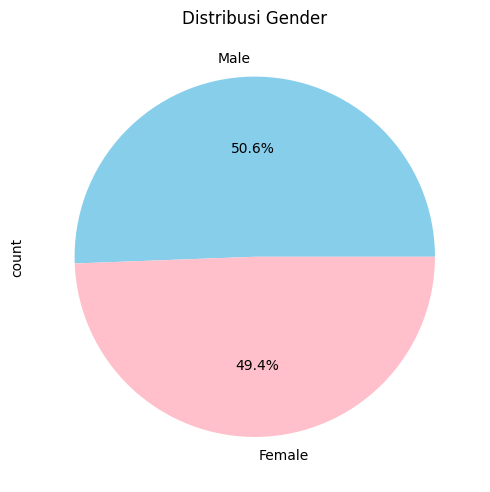

In [13]:
# Visualisasi Pie Plot

plt.figure(figsize=(5, 25))
df['Gender'].value_counts().plot(kind='pie', autopct='%1.1f%%', colors=['skyblue', 'pink'])
plt.title(f'Distribusi Gender')
plt.tight_layout()
plt.show()

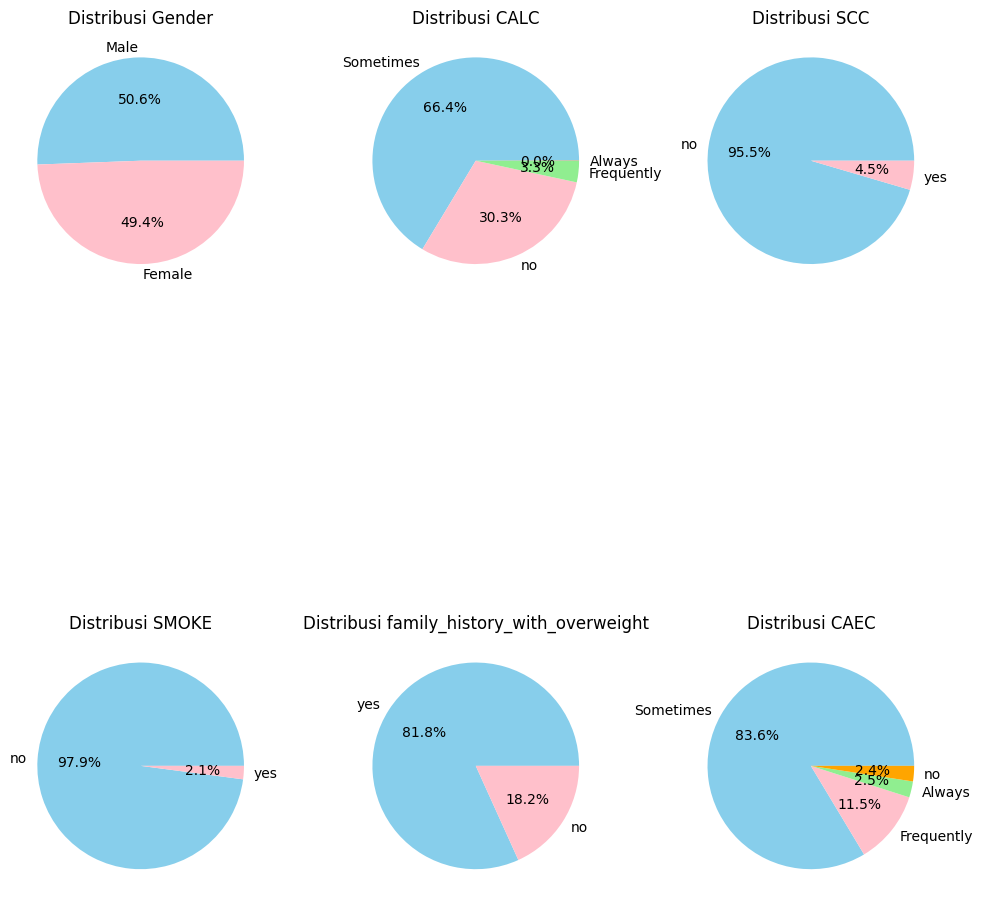

In [14]:
# Visualisasi Pie Plot
columns = ['Gender', 'CALC', 'SCC', 'SMOKE', 'family_history_with_overweight', 'CAEC']

plt.figure(figsize=(10, 15))
for i, column in enumerate(columns, start=1):
    plt.subplot(2, 3, i)
    df[column].value_counts().plot(kind='pie', autopct='%1.1f%%', colors=['skyblue', 'pink', 'lightgreen', 'orange'])
    plt.title(f'Distribusi {column}')
    plt.ylabel('')
plt.tight_layout()
plt.show()

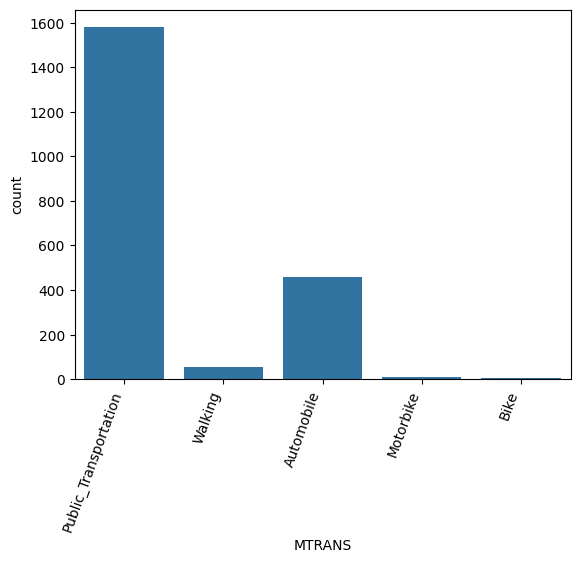

In [15]:
sns.countplot(x = df.MTRANS)
plt.xticks(rotation=70, ha='right') 
plt.show()

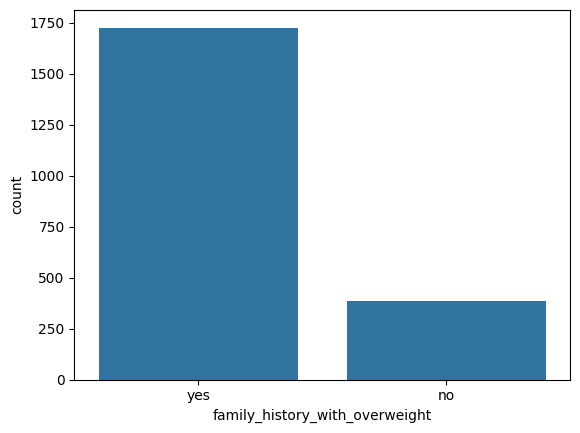

In [16]:
sns.countplot(x = df.family_history_with_overweight)
plt.show()

### Deskripsi statistik

In [17]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,2111.0,24.312600,6.345968,14.00,19.947192,22.777890,26.000000,61.00
Height,2111.0,1.701677,0.093305,1.45,1.630000,1.700499,1.768464,1.98
Weight,2111.0,86.586058,26.191172,39.00,65.473343,83.000000,107.430682,173.00
FCVC,2111.0,2.419043,0.533927,1.00,2.000000,2.385502,3.000000,3.00
NCP,2111.0,2.685628,0.778039,1.00,2.658738,3.000000,3.000000,4.00
CH2O,2111.0,2.008011,0.612953,1.00,1.584812,2.000000,2.477420,3.00
FAF,2111.0,1.010298,0.850592,0.00,0.124505,1.000000,1.666678,3.00
TUE,2111.0,0.657866,0.608927,0.00,0.000000,0.625350,1.000000,2.00


### Check Missing Value

In [18]:
df.isnull().sum()

Age                               0
Gender                            0
Height                            0
Weight                            0
CALC                              0
FAVC                              0
FCVC                              0
NCP                               0
SCC                               0
SMOKE                             0
CH2O                              0
family_history_with_overweight    0
FAF                               0
TUE                               0
CAEC                              0
MTRANS                            0
NObeyesdad                        0
dtype: int64

In [19]:
df.NObeyesdad.unique()

array(['Normal_Weight', 'Overweight_Level_I', 'Overweight_Level_II',
       'Obesity_Type_I', 'Insufficient_Weight', 'Obesity_Type_II',
       'Obesity_Type_III'], dtype=object)

### Check Duplicated data

In [20]:
df.duplicated().sum()

24

In [21]:
df = df.drop_duplicates()
df.duplicated().sum()

0

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2087 entries, 0 to 2110
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Age                             2087 non-null   float64
 1   Gender                          2087 non-null   object 
 2   Height                          2087 non-null   float64
 3   Weight                          2087 non-null   float64
 4   CALC                            2087 non-null   object 
 5   FAVC                            2087 non-null   object 
 6   FCVC                            2087 non-null   float64
 7   NCP                             2087 non-null   float64
 8   SCC                             2087 non-null   object 
 9   SMOKE                           2087 non-null   object 
 10  CH2O                            2087 non-null   float64
 11  family_history_with_overweight  2087 non-null   object 
 12  FAF                             2087 no

In [23]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,2087.0,24.353090,6.368801,14.00,19.915937,22.847618,26.000000,61.00
Height,2087.0,1.702674,0.093186,1.45,1.630178,1.701584,1.769491,1.98
Weight,2087.0,86.858730,26.190847,39.00,66.000000,83.101100,108.015907,173.00
FCVC,2087.0,2.421466,0.534737,1.00,2.000000,2.396265,3.000000,3.00
NCP,2087.0,2.701179,0.764614,1.00,2.697467,3.000000,3.000000,4.00
CH2O,2087.0,2.004749,0.608284,1.00,1.590922,2.000000,2.466193,3.00
FAF,2087.0,1.012812,0.853475,0.00,0.124505,1.000000,1.678102,3.00
TUE,2087.0,0.663035,0.608153,0.00,0.000000,0.630866,1.000000,2.00


In [24]:
# Inisialisasi LabelEncoder
label_encoder = LabelEncoder()

# Loop untuk melakukan label encoding pada setiap kolom kategori
for column in df.select_dtypes(include=['object']).columns:
    df[column] = label_encoder.fit_transform(df[column])

C:\Users\Asus\AppData\Local\Temp\ipykernel_11920\487940495.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[column] = label_encoder.fit_transform(df[column])
C:\Users\Asus\AppData\Local\Temp\ipykernel_11920\487940495.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[column] = label_encoder.fit_transform(df[column])
C:\Users\Asus\AppData\Local\Temp\ipykernel_11920\487940495.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,

In [25]:
df.corr()

,Age,Gender,Height,Weight,CALC,FAVC,FCVC,NCP,SCC,SMOKE,CH2O,family_history_with_overweight,FAF,TUE,CAEC,MTRANS,NObeyesdad
Age,1.000000,0.050641,-0.031748,0.198160,-0.045565,0.063895,0.013572,-0.055823,-0.117959,0.091261,-0.044058,0.200379,-0.148202,-0.302927,0.092097,-0.601476,0.238308
Gender,0.050641,1.000000,0.626748,0.163176,0.010574,0.061220,-0.271575,0.077863,-0.102435,0.045501,0.095129,0.113492,0.189471,0.022356,0.074564,-0.139044,0.014699
Height,-0.031748,0.626748,1.000000,0.457468,-0.135756,0.180694,-0.040363,0.227806,-0.137078,0.054326,0.220487,0.232258,0.293584,0.041808,0.058001,-0.068258,0.038700
Weight,0.198160,0.163176,0.457468,1.000000,-0.211351,0.274655,0.216574,0.092149,-0.205409,0.024369,0.203823,0.492969,-0.056490,-0.079351,0.300271,0.009836,0.388802
CALC,-0.045565,0.010574,-0.135756,-0.211351,1.000000,-0.087661,-0.063132,-0.082985,-0.004175,-0.083181,-0.085460,0.028403,0.086825,0.041830,-0.039502,-0.009828,-0.132821
FAVC,0.063895,0.061220,0.180694,0.274655,-0.087661,1.000000,-0.025419,-0.006398,-0.191277,-0.050713,0.002993,0.214329,-0.111184,0.071505,0.147921,-0.069422,0.041023
FCVC,0.013572,-0.271575,-0.040363,0.216574,-0.063132,-0.025419,1.000000,0.034885,0.071179,0.013716,0.081332,0.033199,0.022003,-0.104128,-0.038565,0.069012,0.025728
NCP,-0.055823,0.077863,0.227806,0.092149,-0.082985,-0.006398,0.034885,1.000000,-0.020461,0.005009,0.075335,0.028411,0.127816,0.015693,-0.072316,-0.043648,-0.088235
SCC,-0.117959,-0.102435,-0.137078,-0.205409,-0.004175,-0.191277,0.071179,-0.020461,1.000000,0.047384,0.009325,-0.193947,0.073768,-0.012875,-0.109393,0.044381,-0.050936
SMOKE,0.091261,0.045501,0.054326,0.024369,-0.083181,-0.050713,0.013716,0.005009,0.047384,1.000000,-0.031642,0.014885,0.010811,0.016491,-0.054960,-0.009995,-0.023341


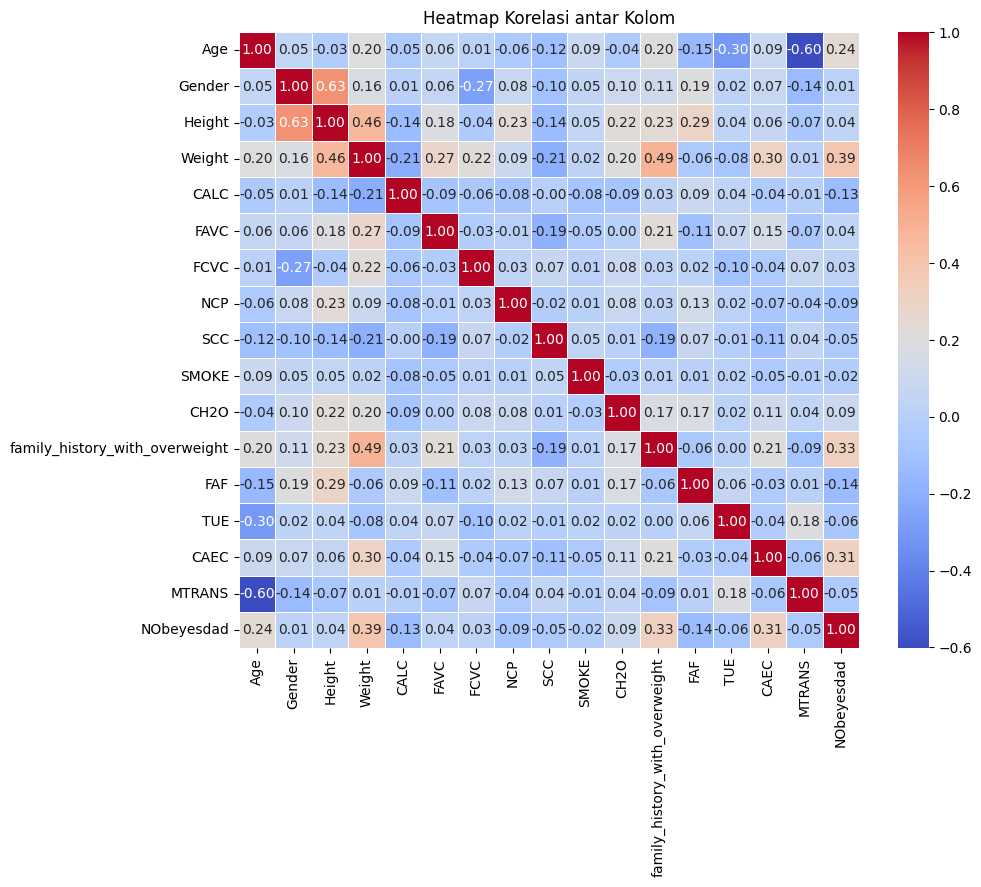

In [26]:
# Plot heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Heatmap Korelasi antar Kolom')
plt.show()

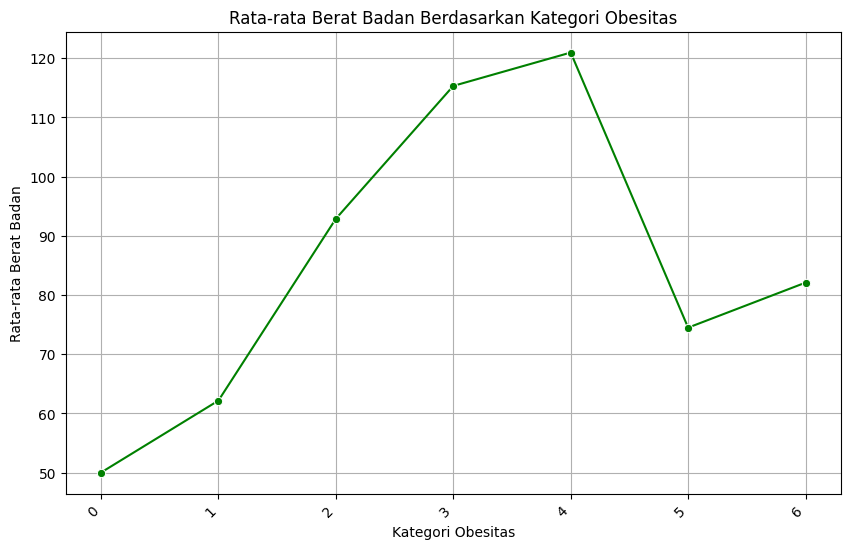

In [27]:
# Agregasi data
avg_height_by_obesity = df.groupby('NObeyesdad')['Weight'].mean().reset_index()

# Plot line chart
plt.figure(figsize=(10, 6))
sns.lineplot(data=avg_height_by_obesity, x='NObeyesdad', y='Weight', marker='o', color='g')
plt.title('Rata-rata Berat Badan Berdasarkan Kategori Obesitas')
plt.xlabel('Kategori Obesitas')
plt.ylabel('Rata-rata Berat Badan')
plt.xticks(rotation=45, ha='right')
plt.grid(True)
plt.show()

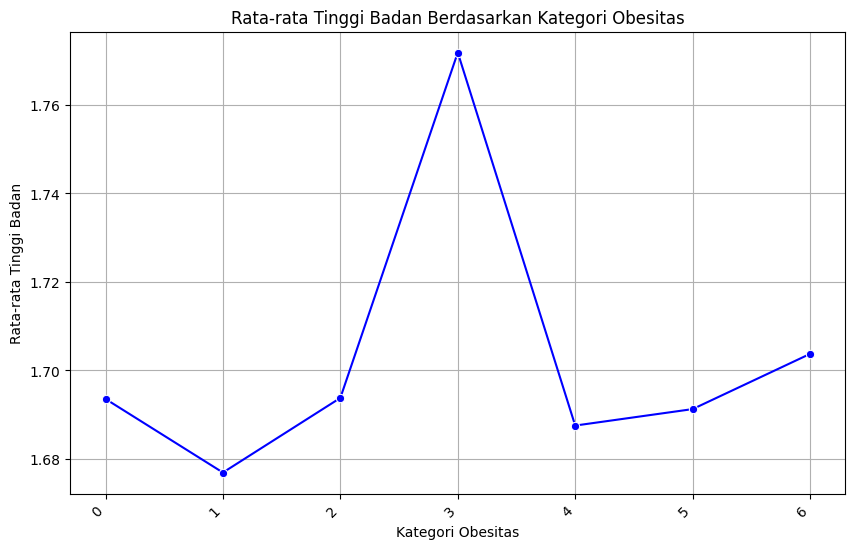

In [28]:
# Agregasi data
avg_height_by_obesity = df.groupby('NObeyesdad')['Height'].mean().reset_index()

# Plot line chart
plt.figure(figsize=(10, 6))
sns.lineplot(data=avg_height_by_obesity, x='NObeyesdad', y='Height', marker='o', color='blue')
plt.title('Rata-rata Tinggi Badan Berdasarkan Kategori Obesitas')
plt.xlabel('Kategori Obesitas')
plt.ylabel('Rata-rata Tinggi Badan')
plt.xticks(rotation=45, ha='right')
plt.grid(True)
plt.show()

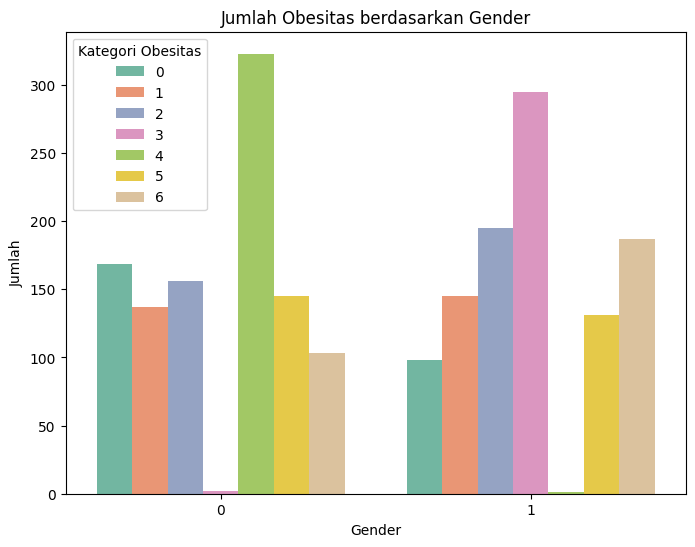

In [29]:
# Plot countplot
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='Gender', hue='NObeyesdad', palette='Set2')
plt.title('Jumlah Obesitas berdasarkan Gender')
plt.xlabel('Gender')
plt.ylabel('Jumlah')
plt.legend(title='Kategori Obesitas')
plt.show()

### Check Imbalance

In [30]:
df.NObeyesdad.value_counts()

NObeyesdad
2    351
4    324
3    297
6    290
1    282
5    276
0    267
Name: count, dtype: int64

In [31]:
target = pd.DataFrame(df.NObeyesdad.value_counts())
target

,count
NObeyesdad,
2,351
4,324
3,297
6,290
1,282
5,276
0,267


In [32]:
target.to_csv('Kolom_target.xlsx')

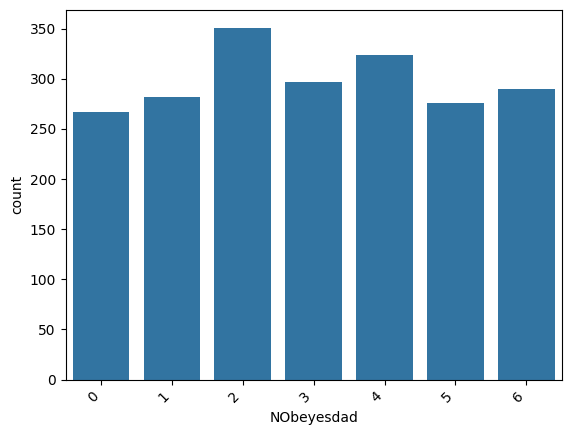

In [33]:
sns.countplot(x=df['NObeyesdad'])
plt.xticks(rotation=45, ha='right') 
plt.show()

In [34]:
df

,Age,Gender,Height,Weight,CALC,FAVC,FCVC,NCP,SCC,SMOKE,CH2O,family_history_with_overweight,FAF,TUE,CAEC,MTRANS,NObeyesdad
0,21.000000,0,1.620000,64.000000,3,0,2.0,3.0,0,0,2.000000,1,0.000000,1.000000,2,3,1
1,21.000000,0,1.520000,56.000000,2,0,3.0,3.0,1,1,3.000000,1,3.000000,0.000000,2,3,1
2,23.000000,1,1.800000,77.000000,1,0,2.0,3.0,0,0,2.000000,1,2.000000,1.000000,2,3,1
3,27.000000,1,1.800000,87.000000,1,0,3.0,3.0,0,0,2.000000,0,2.000000,0.000000,2,4,5
4,22.000000,1,1.780000,89.800000,2,0,2.0,1.0,0,0,2.000000,0,0.000000,0.000000,2,3,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2106,20.976842,0,1.710730,131.408528,2,1,3.0,3.0,0,0,1.728139,1,1.676269,0.906247,2,3,4
2107,21.982942,0,1.748584,133.742943,2,1,3.0,3.0,0,0,2.005130,1,1.341390,0.599270,2,3,4
2108,22.524036,0,1.752206,133.689352,2,1,3.0,3.0,0,0,2.054193,1,1.414209,0.646288,2,3,4
2109,24.361936,0,1.739450,133.346641,2,1,3.0,3.0,0,0,2.852339,1,1.139107,0.586035,2,3,4


In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2087 entries, 0 to 2110
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Age                             2087 non-null   float64
 1   Gender                          2087 non-null   int32  
 2   Height                          2087 non-null   float64
 3   Weight                          2087 non-null   float64
 4   CALC                            2087 non-null   int32  
 5   FAVC                            2087 non-null   int32  
 6   FCVC                            2087 non-null   float64
 7   NCP                             2087 non-null   float64
 8   SCC                             2087 non-null   int32  
 9   SMOKE                           2087 non-null   int32  
 10  CH2O                            2087 non-null   float64
 11  family_history_with_overweight  2087 non-null   int32  
 12  FAF                             2087 no

# Scaling

In [36]:
df.columns

Index(['Age', 'Gender', 'Height', 'Weight', 'CALC', 'FAVC', 'FCVC', 'NCP',
       'SCC', 'SMOKE', 'CH2O', 'family_history_with_overweight', 'FAF', 'TUE',
       'CAEC', 'MTRANS', 'NObeyesdad'],
      dtype='object')

In [37]:
columns = ['Age', 'Height', 'Weight', 'FCVC', 'NCP', 'CH2O', 'FAF', 'TUE', 'CAEC', 'MTRANS']
scaler = StandardScaler()
df_scale = scaler.fit_transform(df[columns])

In [38]:
df[columns]=df_scale

C:\Users\Asus\AppData\Local\Temp\ipykernel_11920\2630822816.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[columns]=df_scale


In [39]:
df

,Age,Gender,Height,Weight,CALC,FAVC,FCVC,NCP,SCC,SMOKE,CH2O,family_history_with_overweight,FAF,TUE,CAEC,MTRANS,NObeyesdad
0,-0.526613,0,-0.887408,-0.872985,3,0,-0.788364,0.390906,0,0,-0.007810,1,-1.186977,0.554211,0.318128,0.506768,1
1,-0.526613,0,-1.960788,-1.178508,2,0,1.082164,0.390906,1,1,1.636552,1,2.328908,-1.090505,0.318128,0.506768,1
2,-0.212507,1,1.044677,-0.376509,1,0,-0.788364,0.390906,0,0,-0.007810,1,1.156947,0.554211,0.318128,0.506768,1
3,0.415705,1,1.044677,0.005395,1,0,1.082164,0.390906,0,0,-0.007810,0,1.156947,-1.090505,0.318128,1.297220,5
4,-0.369560,1,0.830001,0.112328,2,0,-0.788364,-2.225418,0,0,-0.007810,0,-1.186977,-1.090505,0.318128,0.506768,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2106,-0.530250,0,0.086470,1.701376,2,1,1.082164,0.390906,0,0,-0.454848,1,0.777546,0.400014,0.318128,0.506768,4
2107,-0.372239,0,0.492788,1.790528,2,1,1.082164,0.390906,0,0,0.000626,1,0.385081,-0.104876,0.318128,0.506768,4
2108,-0.287258,0,0.531665,1.788482,2,1,1.082164,0.390906,0,0,0.081303,1,0.470422,-0.027545,0.318128,0.506768,4
2109,0.001389,0,0.394745,1.775393,2,1,1.082164,0.390906,0,0,1.393744,1,0.148013,-0.126644,0.318128,0.506768,4


# Splitting

In [40]:
X = df.drop(columns='NObeyesdad')
y = df.NObeyesdad

X_model, X_test, y_model, y_test = train_test_split(X, y, test_size=0.1, random_state=42) # Data Model & data test
X_train, X_val, y_train, y_val = train_test_split(X_model, y_model, test_size=0.2, random_state=42) # Data training & data val
X_train.shape, X_val.shape, X_test.shape, y_train.shape, y_val.shape, y_test.shape

((1502, 16), (376, 16), (209, 16), (1502,), (376,), (209,))

In [41]:
print("Jumlah data training:", len(X_train))
print("Jumlah data validasi:", len(X_val))
print("Jumlah data test:", len(X_test))

Jumlah data training: 1502
Jumlah data validasi: 376
Jumlah data test: 209


In [42]:
y_train

1016    6
1297    2
76      0
408     1
601     0
       ..
1276    2
1474    2
1873    4
1004    6
1352    2
Name: NObeyesdad, Length: 1502, dtype: int32

In [43]:
X_train

,Age,Gender,Height,Weight,CALC,FAVC,FCVC,NCP,SCC,SMOKE,CH2O,family_history_with_overweight,FAF,TUE,CAEC,MTRANS
1016,-0.979196,1,-0.514333,-0.261938,3,1,0.749167,-0.859651,0,0,-0.081859,1,-0.015015,0.314964,0.318128,0.506768
1297,-0.248376,1,0.512108,0.323303,3,1,-0.788364,0.390906,0,0,1.636552,1,2.328908,2.198928,0.318128,0.506768
76,-0.055454,0,-1.102084,-1.598603,3,0,-0.788364,0.390906,0,0,-0.007810,1,-0.015015,-1.090505,2.494958,0.506768
408,-0.683666,1,1.152015,-0.300128,2,0,1.082164,-2.225418,0,0,-0.007810,1,-1.186977,-1.090505,0.318128,0.506768
601,-0.826373,0,-1.059975,-1.598603,2,0,1.082164,0.390906,1,0,-1.187705,0,0.690447,-1.090505,-1.858702,0.506768
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1276,-0.826648,1,-0.026943,0.471498,3,1,-0.788364,-0.760504,0,0,-0.007810,1,-1.186977,2.005737,0.318128,0.506768
1474,-0.239256,0,-0.929431,-0.163294,3,1,0.453416,-1.680818,0,0,0.615856,1,-0.886576,-0.106564,0.318128,0.506768
1873,-0.092837,0,-0.121551,1.054895,2,1,1.082164,0.390906,0,0,0.830050,1,-0.795232,0.008448,0.318128,0.506768
1004,-1.065291,1,-0.028704,-0.139765,3,0,-0.606225,-0.201579,0,0,-0.766476,1,-0.015015,0.162601,0.318128,0.506768


### Model

In [44]:
# Memilih model terbaik untuk pengujian lebih lanjut
model = LogisticRegression()
model.fit(X_train, y_train)

C:\Users\Asus\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [45]:
y_pred = model.predict(X_test)
y_pred

array([2, 3, 5, 0, 3, 5, 2, 4, 0, 0, 3, 2, 4, 1, 6, 5, 5, 3, 5, 6, 4, 5,
       0, 0, 2, 2, 0, 0, 0, 2, 1, 1, 2, 3, 6, 4, 5, 1, 0, 1, 1, 2, 5, 4,
       0, 5, 3, 5, 1, 4, 6, 0, 2, 4, 4, 4, 5, 2, 6, 6, 6, 2, 1, 3, 1, 3,
       2, 5, 2, 2, 6, 5, 2, 5, 2, 0, 3, 1, 0, 0, 5, 5, 4, 2, 1, 0, 3, 6,
       1, 2, 3, 3, 3, 3, 2, 3, 2, 4, 6, 4, 0, 6, 3, 6, 0, 1, 0, 1, 4, 2,
       1, 3, 2, 0, 4, 3, 5, 3, 1, 3, 0, 5, 2, 0, 5, 4, 5, 1, 5, 1, 3, 0,
       6, 2, 5, 2, 6, 1, 5, 5, 4, 6, 5, 1, 4, 5, 5, 4, 4, 5, 0, 4, 4, 2,
       1, 3, 0, 4, 4, 2, 1, 3, 3, 0, 3, 1, 1, 4, 6, 0, 2, 0, 3, 5, 0, 5,
       6, 6, 6, 1, 0, 5, 3, 3, 0, 6, 1, 3, 6, 6, 3, 3, 2, 5, 4, 1, 2, 5,
       2, 0, 2, 4, 2, 5, 6, 2, 2, 6, 5])

## Evaluasi Model

In [48]:
# Evaluasi model terbaik
print("Evaluation of the best model:")
print("Accuracy:", accuracy_score(y_test, y_pred))

Evaluation of the best model:


NameError: name 'accuracy_score' is not defined

In [47]:
print("Classification Report:")
print(classification_report(y_test, y_pred))

Classification Report:


NameError: name 'classification_report' is not defined

In [ ]:
print("Confusion Matrix:")
cm = confusion_matrix(y_test, y_pred)
cm

Confusion Matrix:


array([[25,  2,  0,  0,  0,  0,  0],
       [ 6, 23,  0,  0,  0,  6,  0],
       [ 0,  0, 32,  1,  0,  0,  2],
       [ 0,  0,  0, 30,  0,  0,  0],
       [ 0,  0,  0,  0, 26,  0,  0],
       [ 0,  2,  0,  0,  0, 26,  3],
       [ 0,  0,  3,  0,  0,  3, 19]], dtype=int64)

Text(0.5, 1.0, 'Confusion Matrix Model')

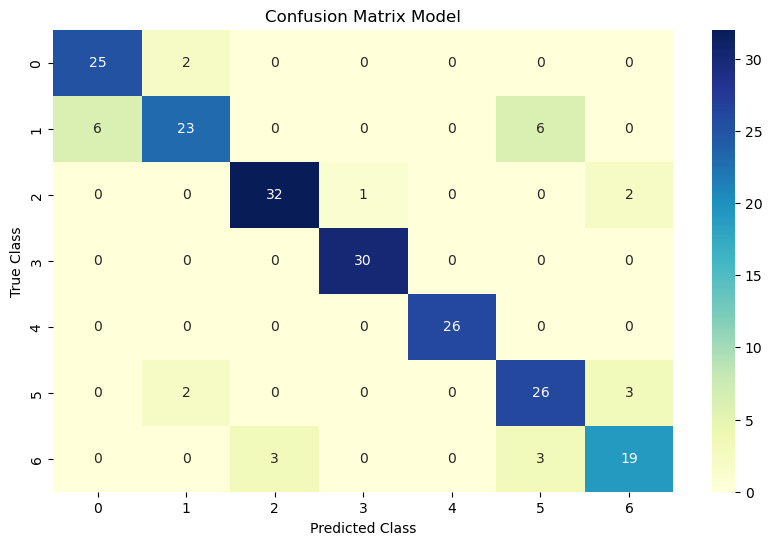

In [ ]:
fig = plt.figure(figsize = (10, 6))
sns.heatmap(cm, annot = True, fmt = "d", cmap= 'YlGnBu')

# Labeling the X-axis
plt.xlabel("Predicted Class")

# Labeling the Y-axis
plt.ylabel("True Class")

# Give a title to the graph
plt.title("Confusion Matrix Model")

# ANN 

# Splitting

In [ ]:
X = df.drop(columns='NObeyesdad')
y = df.NObeyesdad

X_model, X_test, y_model, y_test = train_test_split(X, y, test_size=0.1, random_state=42) # Data Model & data test
X_train, X_val, y_train, y_val = train_test_split(X_model, y_model, test_size=0.2, random_state=42) # Data training & data val
X_train.shape, X_val.shape, X_test.shape, y_train.shape, y_val.shape, y_test.shape

((1502, 16), (376, 16), (209, 16), (1502,), (376,), (209,))

In [ ]:
print("Jumlah data training:", len(X_train))
print("Jumlah data validasi:", len(X_val))
print("Jumlah data test:", len(X_test))

Jumlah data training: 1502
Jumlah data validasi: 376
Jumlah data test: 209


In [ ]:
y_train

1016    6
1297    2
76      0
408     1
601     0
       ..
1276    2
1474    2
1873    4
1004    6
1352    2
Name: NObeyesdad, Length: 1502, dtype: int32

In [ ]:
X_train

,Age,Gender,Height,Weight,CALC,FAVC,FCVC,NCP,SCC,SMOKE,CH2O,family_history_with_overweight,FAF,TUE,CAEC,MTRANS
1016,-0.979196,1,-0.514333,-0.261938,3,1,0.749167,-0.859651,0,0,-0.081859,1,-0.015015,0.314964,0.318128,0.506768
1297,-0.248376,1,0.512108,0.323303,3,1,-0.788364,0.390906,0,0,1.636552,1,2.328908,2.198928,0.318128,0.506768
76,-0.055454,0,-1.102084,-1.598603,3,0,-0.788364,0.390906,0,0,-0.007810,1,-0.015015,-1.090505,2.494958,0.506768
408,-0.683666,1,1.152015,-0.300128,2,0,1.082164,-2.225418,0,0,-0.007810,1,-1.186977,-1.090505,0.318128,0.506768
601,-0.826373,0,-1.059975,-1.598603,2,0,1.082164,0.390906,1,0,-1.187705,0,0.690447,-1.090505,-1.858702,0.506768
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1276,-0.826648,1,-0.026943,0.471498,3,1,-0.788364,-0.760504,0,0,-0.007810,1,-1.186977,2.005737,0.318128,0.506768
1474,-0.239256,0,-0.929431,-0.163294,3,1,0.453416,-1.680818,0,0,0.615856,1,-0.886576,-0.106564,0.318128,0.506768
1873,-0.092837,0,-0.121551,1.054895,2,1,1.082164,0.390906,0,0,0.830050,1,-0.795232,0.008448,0.318128,0.506768
1004,-1.065291,1,-0.028704,-0.139765,3,0,-0.606225,-0.201579,0,0,-0.766476,1,-0.015015,0.162601,0.318128,0.506768


### Model

In [ ]:
X_train.shape

(1502, 16)

In [ ]:
X_train.shape[0]

1502

In [ ]:
X_train.shape[1]

16

f(x) = max(0,x)

jika input < 0 , maka f(x) = 0
jika input > 0 , maka f(x) = x

In [ ]:
from tensorflow.keras.optimizers import Adam
model = Sequential()
model.add(Dense(units= 32,activation='relu', input_shape=(X_train.shape[1],))) #input layer
model.add(Dense(units = 32,activation='relu')) #hidden # sunction activation = relu (leaky relu, dll), sigmoid, tanh, softmax
model.add(Dense(units = 32,activation='relu')) #hidden
model.add(Dense(7, activation='softmax')) # gunakan softmax: output > 2,
                                          # gunakan sigmoid: output = 2 
model.compile(loss ='sparse_categorical_crossentropy',optimizer='Adam',metrics=['accuracy']) #  optimizer='adam', SGD, Adamax
model.summary() # loss ='categorical_crossentropy', sparse_categorical_crossentropy, binary_crossentropy

D:\New folder\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 32)             │           544 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 7)              │           231 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,887 (11.28 KB)

 Trainable params: 2,887 (11.28 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
early_stopping = EarlyStopping(monitor='val_loss', patience=10, mode = 'min', restore_best_weights=True)


history = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_data=(X_val, y_val), callbacks=[early_stopping])

Epoch 1/100
47/47 ━━━━━━━━━━━━━━━━━━━━ 4s 14ms/step - accuracy: 0.1677 - loss: 1.9382 - val_accuracy: 0.3910 - val_loss: 1.7306
Epoch 2/100
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.3849 - loss: 1.6686 - val_accuracy: 0.5293 - val_loss: 1.3260
Epoch 3/100
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.5277 - loss: 1.2340 - val_accuracy: 0.6250 - val_loss: 0.9689
Epoch 4/100
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6544 - loss: 0.9236 - val_accuracy: 0.7021 - val_loss: 0.7787
Epoch 5/100
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7117 - loss: 0.7450 - val_accuracy: 0.7766 - val_loss: 0.6117
Epoch 6/100
47/47 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.8111 - loss: 0.5803 - val_accuracy: 0.8191 - val_loss: 0.4997
Epoch 7/100
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8462 - loss: 0.4859 - val_accuracy: 0.8590 - val_loss: 0.4299
Epoch 8/100
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8710 - loss: 0.4037 - val_accuracy: 0.8830 -

# Evaluate model

In [ ]:
evaluation = model.evaluate(X_test, y_test)

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9618 - loss: 0.1144 


## **VISUALISASI**

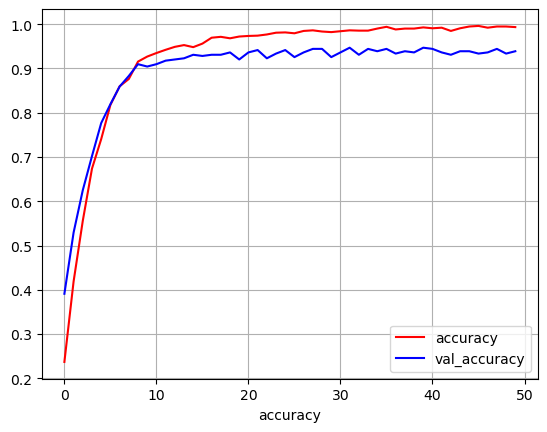

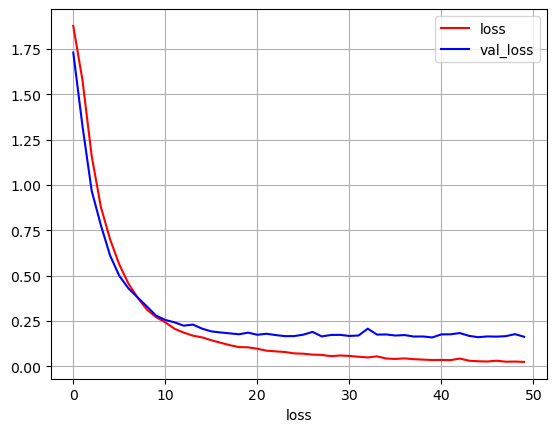

In [ ]:
def plot_graphs(history, string):
    plt.plot(history.history[string], color = 'red')
    plt.plot(history.history['val_'+string], color = 'blue')
    plt.xlabel('epoch')
    plt.xlabel(string)
    plt.legend([string, "val_"+string])
    plt.grid()
    plt.show()

plot_graphs(history, 'accuracy')
plot_graphs(history, 'loss')

In [ ]:
y_pred = np.argmax(model.predict(X_test),axis=1)
y_pred

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


array([2, 3, 5, 0, 3, 5, 6, 4, 0, 1, 3, 2, 4, 1, 6, 5, 5, 3, 6, 5, 4, 5,
       1, 0, 2, 2, 0, 0, 0, 2, 1, 1, 2, 3, 6, 4, 5, 1, 0, 5, 1, 2, 5, 4,
       1, 5, 3, 5, 1, 4, 6, 0, 2, 4, 4, 4, 5, 2, 6, 6, 6, 2, 1, 3, 1, 3,
       2, 5, 6, 2, 6, 1, 2, 5, 2, 0, 3, 1, 0, 0, 5, 5, 4, 2, 0, 0, 3, 6,
       1, 2, 3, 3, 3, 3, 2, 3, 2, 4, 6, 4, 1, 6, 2, 6, 1, 5, 0, 5, 4, 2,
       1, 3, 2, 0, 4, 3, 5, 3, 1, 3, 0, 5, 2, 0, 5, 4, 5, 1, 5, 1, 3, 0,
       6, 2, 5, 2, 6, 1, 5, 5, 4, 5, 5, 1, 4, 1, 6, 4, 4, 6, 0, 4, 4, 2,
       1, 3, 0, 4, 4, 2, 1, 3, 3, 0, 3, 1, 1, 4, 6, 0, 2, 0, 3, 5, 0, 6,
       6, 2, 6, 1, 0, 1, 3, 3, 0, 6, 1, 3, 6, 2, 3, 3, 2, 5, 4, 1, 2, 5,
       6, 1, 2, 4, 2, 5, 6, 2, 2, 6, 5], dtype=int64)

In [ ]:
y_test

1337    2
1763    3
389     5
595     0
1735    3
       ..
1138    6
361     2
1346    2
1134    6
757     5
Name: NObeyesdad, Length: 209, dtype: int32

In [ ]:
print("Evaluation model ann:")
print("Accuracy:", accuracy_score(y_test, y_pred))

Evaluation model ann:
Accuracy: 0.9569377990430622


In [ ]:
print("Classification Report:")
print(classification_report(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.96      0.98        27
           1       0.94      0.86      0.90        35
           2       1.00      1.00      1.00        35
           3       1.00      1.00      1.00        30
           4       1.00      1.00      1.00        26
           5       0.85      0.90      0.88        31
           6       0.93      1.00      0.96        25

    accuracy                           0.96       209
   macro avg       0.96      0.96      0.96       209
weighted avg       0.96      0.96      0.96       209



In [ ]:
print("Confusion Matrix:")
cm = confusion_matrix(y_test, y_pred)
cm

Confusion Matrix:


array([[26,  1,  0,  0,  0,  0,  0],
       [ 0, 30,  0,  0,  0,  5,  0],
       [ 0,  0, 35,  0,  0,  0,  0],
       [ 0,  0,  0, 30,  0,  0,  0],
       [ 0,  0,  0,  0, 26,  0,  0],
       [ 0,  1,  0,  0,  0, 28,  2],
       [ 0,  0,  0,  0,  0,  0, 25]], dtype=int64)

Text(0.5, 1.0, 'Confusion Matrix Model')

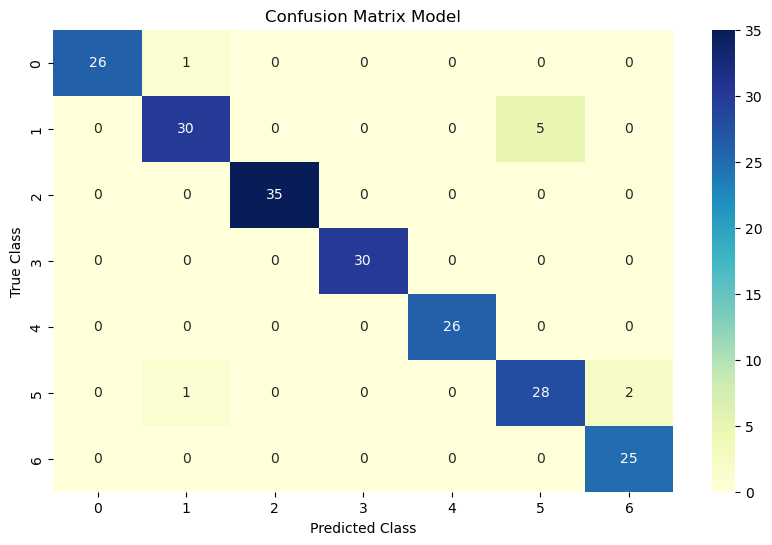

In [ ]:
fig = plt.figure(figsize = (10, 6))
sns.heatmap(cm, annot = True, fmt = "d", cmap= 'YlGnBu')

# Labeling the X-axis
plt.xlabel("Predicted Class")

# Labeling the Y-axis
plt.ylabel("True Class")

# Give a title to the graph
plt.title("Confusion Matrix Model")

In [5]:
import pickle

In [7]:
filename = 'obesitas_model1.sav'
pickle.dump(model, open(filename,'wb'))

NameError: name 'model' is not defined